In [2]:
from deep_translator import GoogleTranslator
def traduccion(to_translate):
    #print(to_translate)
    #print(len(to_translate))
    if len(to_translate)>1:
        translated = GoogleTranslator(source='es', target='english').translate(to_translate)
    else:
        translated = "NAN"
    return translated

In [3]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint
from sklearn.decomposition import PCA
from datetime import datetime


C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [8]:
def desc_sentimiento(row):
    numero = row['compound']
    if(numero>=0.32):
        descipcion="Positivo"
    elif(numero>=-0.34):
        descipcion="Neutro"
    else:
        descipcion="Negativo"
    return descipcion

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
spanishStemmer = stopwords.words('spanish')
import regex
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim
from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
datos_playstore= pd.read_excel("C:/Users/ASUS/Downloads/example_playstore.xlsx")

In [9]:
datos_playstore['procesado']=datos_playstore['Observacion'].str.slice(0, 5000)
datos_playstore['Observacion_ingles']=datos_playstore['procesado'].apply(lambda text: traduccion(text))

KeyboardInterrupt: 

In [10]:
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(datos_playstore['Observacion_ingles'])
datos_playstore['neg'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neg'])
datos_playstore['neu'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['neu'])
datos_playstore['pos'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['pos'])
datos_playstore['compound'] = datos_playstore['Observacion_ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
datos_playstore['sentimiento'] = datos_playstore.apply(desc_sentimiento, axis=1, result_type='expand')
datos_playstore.head()

,Unnamed: 0,Usuario,cantidad_estrellas,fecha,Observacion,Respuesta,Fecha_Respusta,fecha_format,fecha_Respusta_format,dias_para_gestion,id_registro,procesado,Observacion_ingles,neg,neu,pos,compound,sentimiento
0,0,['Luz Helena Jimenez Carreño'],2,"April 29, 2021",Pide cambio de contraseña para registro y dice...,Nan,"March 25, 2021",2021-04-29,2021-03-25,0,0,Pide cambio de contraseña para registro y dice...,He asks for a password change for registration...,0.090,0.714,0.196,0.8702,Positivo
1,1,['Rodrigo Murillo Acosta'],1,"May 5, 2021",La peor aplicación de seguridad que puede habe...,Nan,"March 25, 2021",2021-05-05,2021-03-25,0,1,La peor aplicación de seguridad que puede habe...,"The worst security application there can be, y...",0.098,0.806,0.096,-0.2749,Neutro
2,2,['DIANA DEL PILAR MEDINA AGUILAR'],1,"May 7, 2021",La aplicación no abre desde la última actualiz...,Queremos saber si la aplicación sigue presenta...,"June 5, 2019",2021-05-07,2019-06-05,-702,2,La aplicación no abre desde la última actualiz...,The application does not open since the last u...,0.252,0.748,0.000,-0.9346,Negativo
3,3,['Martha Sofia Rangel Villamizar'],1,"May 4, 2021",No permite ingresar a consultas y transaccione...,Nan,"June 5, 2019",2021-05-04,2019-06-05,0,3,No permite ingresar a consultas y transaccione...,It does not allow to enter inquiries and trans...,0.155,0.845,0.000,-0.7154,Negativo
4,4,['Luz Helena Jimenez Carreño'],2,"April 29, 2021",Pide cambio de contraseña para registro y dice...,Nan,"June 5, 2019",2021-04-29,2019-06-05,0,4,Pide cambio de contraseña para registro y dice...,He asks for a password change for registration...,0.090,0.714,0.196,0.8702,Positivo


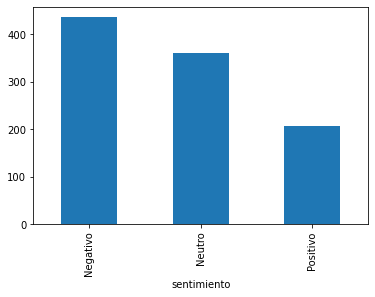

In [11]:
datos_playstore.groupby('sentimiento').count()["Observacion"].plot(kind='bar')

In [15]:
datos_playstore.groupby('sentimiento').count()["Observacion"]

sentimiento
Negativo    437
Neutro      360
Positivo    207
Name: Observacion, dtype: int64

In [22]:
datos2=datos_playstore[datos_playstore.Respuesta!="Nan"]
datos2.groupby('sentimiento').count()["Observacion"]

sentimiento
Negativo    334
Neutro      290
Positivo    170
Name: Observacion, dtype: int64

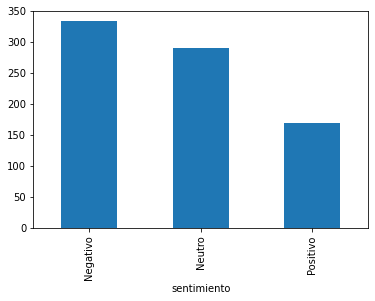

In [24]:
datos2.groupby('sentimiento').count()["Observacion"].plot(kind='bar')

In [23]:
datos3=datos_playstore[datos_playstore.Respuesta=="Nan"]
datos3.groupby('sentimiento').count()["Observacion"]

sentimiento
Negativo    103
Neutro       70
Positivo     37
Name: Observacion, dtype: int64

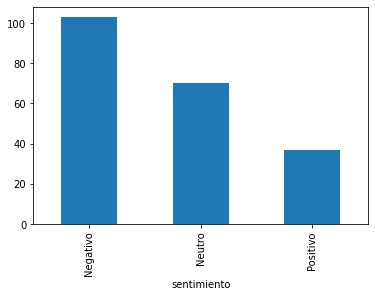

In [25]:
datos3.groupby('sentimiento').count()["Observacion"].plot(kind='bar')

In [39]:
df2=datos_playstore[datos_playstore.dias_para_gestion>=0]
df3=df2[df2.Respuesta!="Nan"]

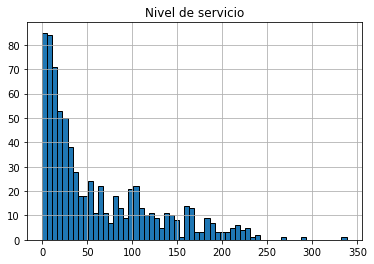

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt


#Datos aleatorios para el ejemplo
plt.title('Nivel de servicio')
plt.hist(df2[df2.Respuesta!="Nan"].dias_para_gestion, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [42]:
df3.groupby('dias_para_gestion').count()["Observacion"].head(30)

dias_para_gestion
0     27
1      6
2     12
3     18
4     11
5     11
6     16
7     12
8     12
9     19
10    15
11    10
12    20
13    10
14    19
15     8
16    14
17     8
18     9
19    10
20    12
21     6
22     8
23     9
24    11
25     8
26     6
27     8
28     8
29     9
Name: Observacion, dtype: int64